In [258]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import dmitry_yanakov as model
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# 1

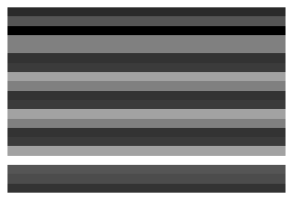

In [18]:
W = 30

background = np.array([
(W*[15], W*[20], W*[10], W*[25])
+ 3*(W*[25], W*[16], W*[17], W*[29])
+ (W*[40], W*[20], W*[19], W*[16])
]).squeeze()

plt.figure(figsize=(5,10))
plt.imshow(background, cmap="gray")
plt.axis("off")

plt.savefig("background.pdf", bbox_inches = 'tight')
plt.show()

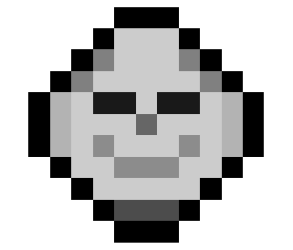

In [52]:
face = np.array([
[0, 0, 0, 0, 0, 100, 100, 100, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 100, 20, 20, 20, 100, 0, 0, 0, 0],
[0, 0, 0, 100, 50, 20, 20, 20, 50, 100, 0, 0, 0],
[0, 0, 100, 50, 20, 20, 20, 20, 20, 50, 100, 0,0],
[0, 100, 30, 20, 90, 90, 20, 90, 90, 20, 30, 100, 0],
[0, 100, 30, 20, 20, 20, 60, 20, 20, 20, 30, 100, 0],
[0, 100, 30, 20, 45, 20, 20, 20, 45, 20, 30, 100, 0],
[0, 0, 100, 20, 20, 45, 45, 45, 20, 20, 100, 0,0],
[0, 0, 0, 100, 20, 20, 20, 20, 20, 100, 0, 0, 0],
[0, 0, 0, 0, 100, 70, 70, 70, 100, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 100, 100, 100, 0, 0, 0, 0, 0],
])

face = 255 - face

plt.figure(figsize=(5,10))
plt.imshow(face, cmap="gray")
plt.axis("off")

plt.savefig("face.pdf", bbox_inches = 'tight')
plt.show()

In [53]:
h, w = face.shape
H, W = background.shape

H, W, h, w

(20, 30, 11, 13)

# 2

In [97]:
def generate(K, s):
    data = []

    for i in range(K):
        h_coord = np.random.randint(H - h + 1)
        w_coord = np.random.randint(W - w + 1)

        X = background.copy()
        X[h_coord:h_coord + h, w_coord:w_coord + w] = face
        X[X == 0] = background[X == 0]

        X = X + np.random.normal(0, s, size=(H,W))
        X[X > 255] = 255

        data.append(X)

    data = np.array(data).transpose(1,2,0)
    
    return data

In [117]:
K = 500
s = 125

data = generate(K, s)

n = 5

F_list = []
B_list = []

for i in range(n):
    F, B, _, _, _ = model.run_EM(data, h, w, max_iter=5)
    
    F_list.append(F)
    B_list.append(B)

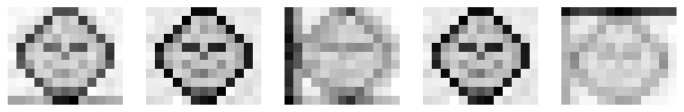

In [118]:
plt.figure(figsize=(12, 5))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(F_list[i], cmap="gray")
    plt.axis("off")

plt.savefig("faces.pdf", bbox_inches = 'tight')
plt.show()

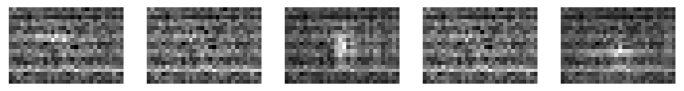

In [119]:
plt.figure(figsize=(12, 10))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(B_list[i], cmap="gray")
    plt.axis("off")

plt.savefig("backgrounds.pdf", bbox_inches = 'tight')
plt.show()

# 3

In [122]:
s_list = [125, 250, 500]
K_list = [100, 250, 500, 750, 1000]

In [131]:
dct = {}

for s in s_list:
    data = generate(1000, s)
    
    F_list = []
    B_list = []
    
    for K in K_list:
        F, B, _, _, _ = model.run_EM_with_restarts(data[:, :, :K], h, w, max_iter=5, n_restarts=n)
        
        F_list.append(F)
        B_list.append(B)
    
    dct[s] = (F_list, B_list)

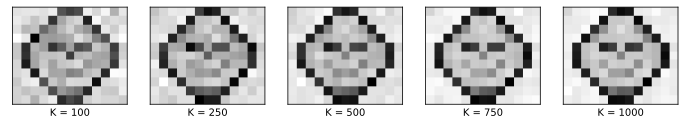

In [145]:
plt.figure(figsize=(12, 5))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(dct[125][0][i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("faces_125.pdf", bbox_inches = 'tight')
plt.show()

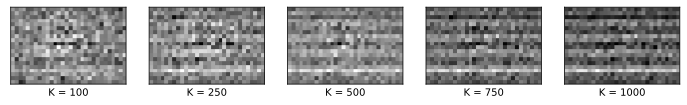

In [148]:
plt.figure(figsize=(12, 5))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(dct[125][1][i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("backgrounds_125.pdf", bbox_inches = 'tight')
plt.show()

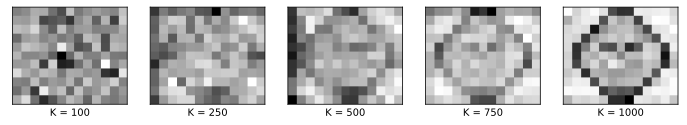

In [146]:
plt.figure(figsize=(12, 5))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(dct[250][0][i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("faces_250.pdf", bbox_inches = 'tight')
plt.show()

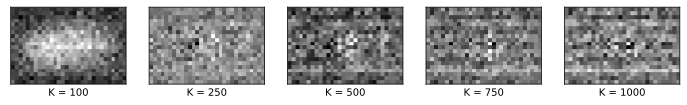

In [150]:
plt.figure(figsize=(12, 5))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(dct[250][1][i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("backgrounds_250.pdf", bbox_inches = 'tight')
plt.show()

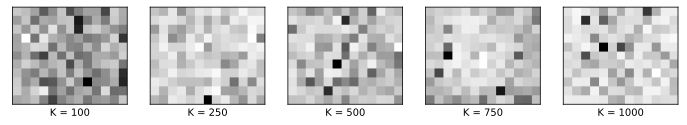

In [147]:
plt.figure(figsize=(12, 5))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(dct[500][0][i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("faces_500.pdf", bbox_inches = 'tight')
plt.show()

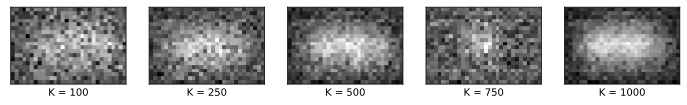

In [151]:
plt.figure(figsize=(12, 5))

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(dct[500][1][i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("backgrounds_500.pdf", bbox_inches = 'tight')
plt.show()

In [175]:
K_new_list = [5,10,15,20,25,35,50,75,100,150,250,500,750,1000]

L_list = []

for K in K_new_list:
    data = generate(K, 250)

    _, _, _, _, L = model.run_EM_with_restarts(data, h, w, max_iter=5, n_restarts=n)

    L_list.append(L / K)

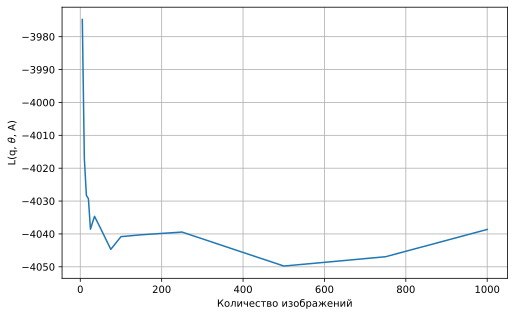

In [180]:
plt.figure(figsize=(8, 5))

plt.plot(K_new_list, L_list)

plt.grid(True)
plt.xlabel("Количество изображений")
plt.ylabel(r"L(q, $\theta$, A)")
plt.savefig("L.pdf", bbox_inches = 'tight')
plt.show()

# 4

In [226]:
import time
n = 10
k = 5

In [222]:
K_list = [100, 250, 500, 750, 1000]

EM_F_list = []
EM_B_list = []

hard_EM_F_list = []
hard_EM_B_list = []

EM_time = []
hard_EM_time = []

for K in K_list:
    data = generate(K, s=150)
    
    start = time.time()
    F, B, _, _, _ = model.run_EM_with_restarts(data[:, :, :K], h, w, max_iter=5, n_restarts=n, use_MAP=False)
    EM_time.append(-(start - time.time())/n)
    
    EM_F_list.append(F)
    EM_B_list.append(B)
    
    start = time.time()
    F, B, _, _, _ = model.run_EM_with_restarts(data[:, :, :K], h, w, max_iter=5, n_restarts=n, use_MAP=True)
    hard_EM_time.append(-(start - time.time())/n)
    
    hard_EM_F_list.append(F)
    hard_EM_B_list.append(B)

In [223]:
EM_time

[0.2331228733062744,
 0.6265696048736572,
 1.2933176040649415,
 1.8785431861877442,
 2.676367473602295]

In [224]:
hard_EM_time

[0.11827020645141602,
 0.31294128894805906,
 0.7594768285751343,
 0.8701081037521362,
 1.2400696992874145]

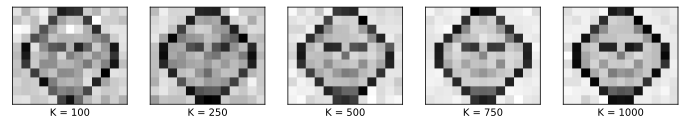

In [250]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(EM_F_list[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_EM_f_150.pdf", bbox_inches = 'tight')
plt.show()

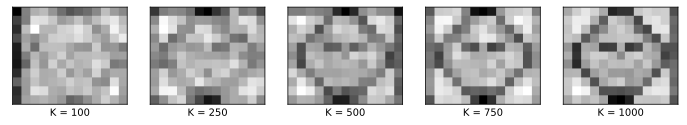

In [251]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(hard_EM_F_list[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_h_EM_f_150.pdf", bbox_inches = 'tight')
plt.show()

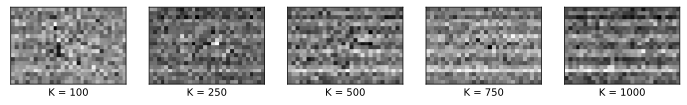

In [252]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(EM_B_list[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_EM_b_150.pdf", bbox_inches = 'tight')
plt.show()

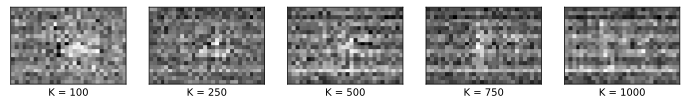

In [253]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(hard_EM_B_list[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_h_EM_b_150.pdf", bbox_inches = 'tight')
plt.show()

In [242]:
K_list = [100, 250, 500, 750, 1000]

EM_F_list_2 = []
EM_B_list_2 = []

hard_EM_F_list_2 = []
hard_EM_B_list_2 = []

EM_time_2 = []
hard_EM_time_2 = []

for K in K_list:
    data = generate(K, s=100)
    
    start = time.time()
    F, B, _, _, _ = model.run_EM_with_restarts(data[:, :, :K], h, w, max_iter=5, n_restarts=n, use_MAP=False)
    EM_time_2.append(-(start - time.time())/n)
    
    EM_F_list_2.append(F)
    EM_B_list_2.append(B)
    
    start = time.time()
    F, B, _, _, _ = model.run_EM_with_restarts(data[:, :, :K], h, w, max_iter=5, n_restarts=n, use_MAP=True)
    hard_EM_time_2.append(-(start - time.time())/n)
    
    hard_EM_F_list_2.append(F)
    hard_EM_B_list_2.append(B)

In [243]:
EM_time_2

[0.2322381019592285,
 0.6563366174697876,
 1.308633804321289,
 1.8351491212844848,
 2.620220923423767]

In [244]:
hard_EM_time_2

[0.10709249973297119,
 0.3389448881149292,
 0.618308711051941,
 0.8699117183685303,
 1.3096393823623658]

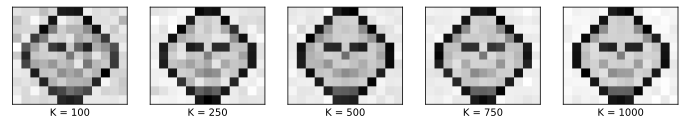

In [254]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(EM_F_list_2[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_EM_f_100.pdf", bbox_inches = 'tight')
plt.show()

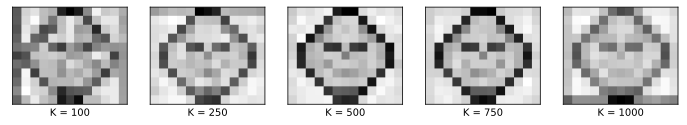

In [255]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(hard_EM_F_list_2[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_h_EM_f_100.pdf", bbox_inches = 'tight')
plt.show()

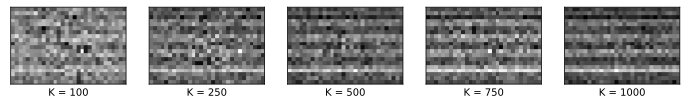

In [256]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(EM_B_list_2[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_EM_b_100.pdf", bbox_inches = 'tight')
plt.show()

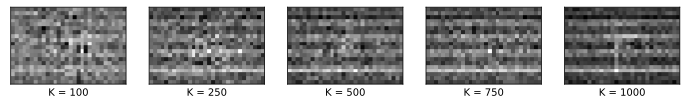

In [257]:
plt.figure(figsize=(12, 5))

for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(hard_EM_B_list_2[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("s_h_EM_b_100.pdf", bbox_inches = 'tight')
plt.show()

# 5

In [168]:
X = np.load('data_vmk22_1000.npy')

In [169]:
K_list = [100, 300, 500, 1000]

F_list = []
B_list = []

for K in K_list:
    F, B, _, _, _ = model.run_EM_with_restarts(X[:, :, :K], h=100, w=67, max_iter=5, n_restarts=5)

    F_list.append(F)
    B_list.append(B)

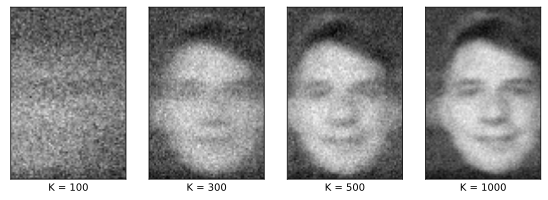

In [172]:
plt.figure(figsize=(12, 5))

for i in range(4):
    plt.subplot(1, n, i + 1)
    plt.imshow(F_list[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("prestupnik.pdf", bbox_inches = 'tight')
plt.show()

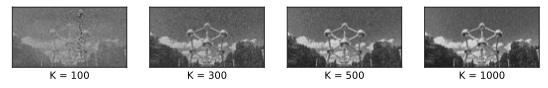

In [173]:
plt.figure(figsize=(12, 5))

for i in range(4):
    plt.subplot(1, n, i + 1)
    plt.imshow(B_list[i], cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(f"K = {K_list[i]}")

plt.savefig("fon.pdf", bbox_inches = 'tight')
plt.show()